In [1]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
import scipy
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
import pickle
from random import sample
from matplotlib_venn import venn2

### Load Data

In [2]:
SC_DF = sc.read_h5ad('./Knockout_CM_DF.h5ad')

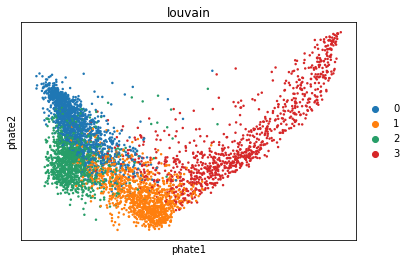

In [35]:
sce.pl.phate(SC_DF, color = 'louvain')

In [36]:
Target_Cells = []
for cell in SC_DF.obs.index:
    if SC_DF[cell].obs.Sample.tolist()[0] == 'WT':
        Target_Cells.append('WT')
    else:
        Target_Cells.append('Perturbed')
SC_DF.obs['Type'] = Target_Cells

### Compare All Expression (Perturbed Cells)

In [45]:
Gene_List = []
Up_Gene_List = []
Class = 'Perturbed'

for cluster in SC_DF.obs.louvain.cat.categories:
    Cluster_Subset = SC_DF[SC_DF.obs.louvain == cluster]
    sc.tl.rank_genes_groups(Cluster_Subset, method='wilcoxon', groups=['Perturbed'], reference=('WT'),groupby = 'Type', key_added='Target')
    Pos_Genes = Cluster_Subset.uns['Target']['names'][Class][Cluster_Subset.uns['Target']['scores'][Class] > 0]
    Pval_Genes = Cluster_Subset.uns['Target']['names'][Class][Cluster_Subset.uns['Target']['pvals_adj'][Class] < 0.05]
    Sig_Genes = [i for i in Pval_Genes if i in Pos_Genes]
    Gene_List.extend(Sig_Genes)
    Up_Gene_List.append(Sig_Genes)
    
Unique_Up_Genes = np.unique(Gene_List)

Overlap_Up_Genes = []
for gene in Gene_List:
    if Gene_List.count(gene) > 1:
        Overlap_Up_Genes.append(gene)
        
Overlap_Up_Genes = np.unique(Overlap_Up_Genes)

        
Up_Dict = dict(zip(SC_DF.obs.louvain.cat.categories.tolist(),Up_Gene_List))

Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


In [46]:
Gene_List = []
Down_Gene_List = []
Class = 'WT'

for cluster in SC_DF.obs.louvain.cat.categories:
    Cluster_Subset = SC_DF[SC_DF.obs.louvain == cluster]
    sc.tl.rank_genes_groups(Cluster_Subset, method='wilcoxon', groups=['WT'], reference=('Perturbed'),groupby = 'Type', key_added='Target')
    Pos_Genes = Cluster_Subset.uns['Target']['names'][Class][Cluster_Subset.uns['Target']['scores'][Class] > 0]
    Pval_Genes = Cluster_Subset.uns['Target']['names'][Class][Cluster_Subset.uns['Target']['pvals_adj'][Class] < 0.05]
    Sig_Genes = [i for i in Pval_Genes if i in Pos_Genes]
    Gene_List.extend(Sig_Genes)
    Down_Gene_List.append(Sig_Genes)
    
Unique_Down_Genes = np.unique(Gene_List)

Overlap_Down_Genes = []
for gene in Gene_List:
    if Gene_List.count(gene) > 1:
        Overlap_Down_Genes.append(gene)
        
Overlap_Down_Genes = np.unique(Overlap_Down_Genes)

        
Down_Dict = dict(zip(SC_DF.obs.louvain.cat.categories.tolist(),Down_Gene_List))

Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


In [47]:
Cluster = '2'
Pvals = []
for gene in Down_Dict['2']:
    pval_pos = np.argwhere(SC_DF.uns['rank_genes_groups']['names'][Cluster] == gene)[0][0]
    if SC_DF.uns['rank_genes_groups']['pvals'][Cluster][pval_pos] == 0:
        Pvals.append(2.225e-308)
    else:
        Pvals.append(SC_DF.uns['rank_genes_groups']['pvals'][Cluster][pval_pos])
        
Cluster_Gene_DF = pd.DataFrame(data=Down_Dict['2'], columns=['Down_Genes'])
Cluster_Gene_DF['Down_Gene_Pval']  = Pvals
Cluster_Gene_DF.to_csv('Down_LateCM.csv')

Pvals = []
for gene in Up_Dict['2']:
    pval_pos = np.argwhere(SC_DF.uns['rank_genes_groups']['names'][Cluster] == gene)[0][0]
    if SC_DF.uns['rank_genes_groups']['pvals'][Cluster][pval_pos] == 0:
        Pvals.append(2.225e-308)
    else:
        Pvals.append(SC_DF.uns['rank_genes_groups']['pvals'][Cluster][pval_pos])
        
Cluster_Gene_DF = pd.DataFrame(data=Up_Dict['2'], columns=['Up_Genes'])
Cluster_Gene_DF['Up_Gene_Pval']  = Pvals
Cluster_Gene_DF.to_csv('./Validation_Late_Enriched.csv')
Cluster_Gene_DF.to_csv('./Up_LateCM.csv')

### UP Genes

In [26]:
SC_Subset = SC_DF[SC_DF.obs.louvain == '2']

In [27]:
Skeletal_Genes = ['MT-ND4',
'TUBB',
'TUBA1B',
'HTRA1',
'S100A10',
'ENO1',
'LDHA',
'PKM',
'MT-ND2',
'GFPT2',
'IL6ST',
'GSTO1',
'GYPC',
'CCDC80',
'FSTL1',
'SOD1',
'EIF1',
'S100A13',
'IGFBP6']


In [28]:
Hypoxia = ['ENO1',
'LDHA',
'PKM',
'MT-CO2',
'MIF',
'TPI1',
'GAPDH',
'PGK1',
'PGAM1',
'BNIP3',
'P4HA1',
'FABP5',
'SLC2A3',
'KRT18']


Trying to set attribute `.obs` of view, copying.
... storing 'Type' as categorical


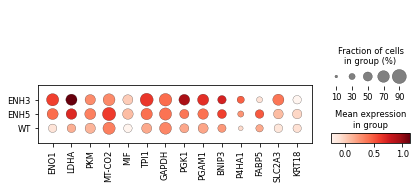

In [29]:
sc.pl.dotplot(SC_Subset, groupby='Sample', var_names=Hypoxia, use_raw=False, save='./Hypoxia_Genes.pdf')

### Down Genes

In [30]:
SC_Subset = SC_DF[SC_DF.obs.louvain == '2']

In [113]:
Dev_Card = ['TRDN',
'MYL9',
'NEBL',
'SLC25A4',
'PLN',
'PDLIM5',
'TNNT2',
'LDB3',
'TNNC1',
'ACTC1',
'MYH6',
'MYL4',
'TNNI1',
'MYL7',
'SMYD1',
'PPP1R12B',
'SLC8A1']

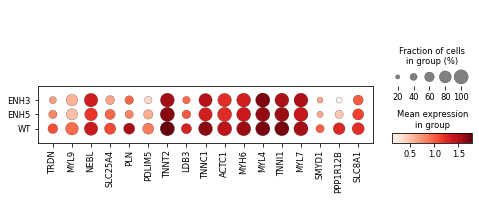

In [121]:
sc.pl.dotplot(SC_Subset, groupby='Sample', var_names=Dev_Card, use_raw=False,  save='./Cardiac_Genes.pdf')